## Let's start simple with a simple regression again:

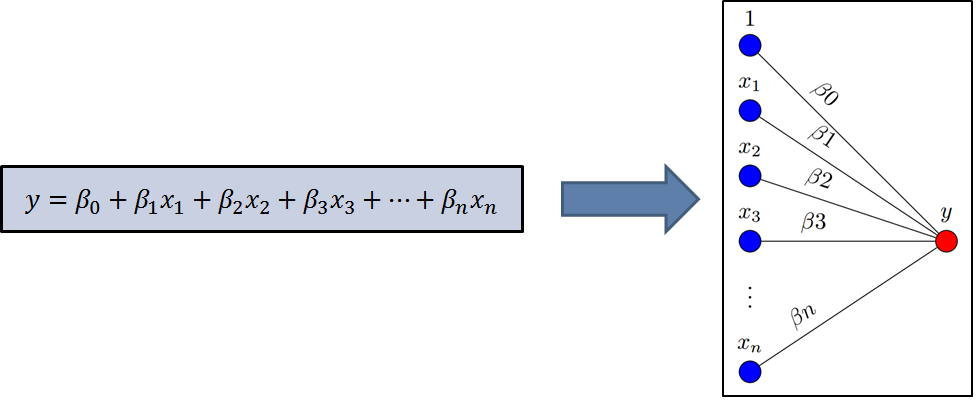

## We can also write down much more equations

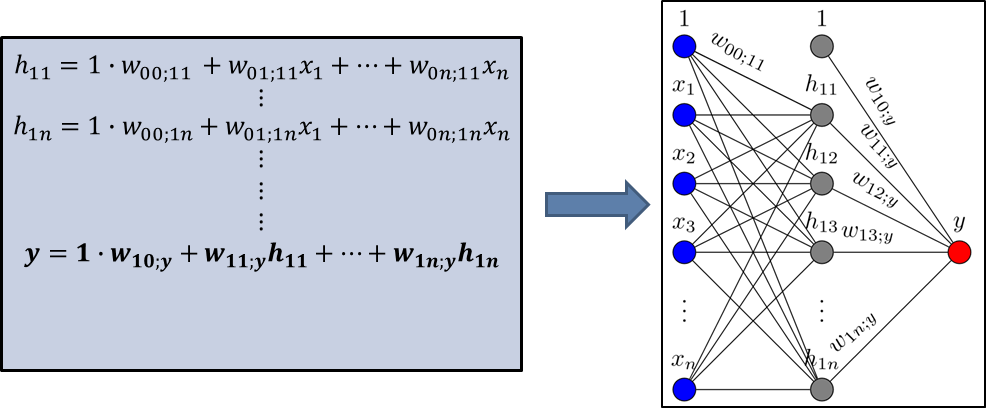

## The output can be a point estimator/forecast or we have multiple targets:

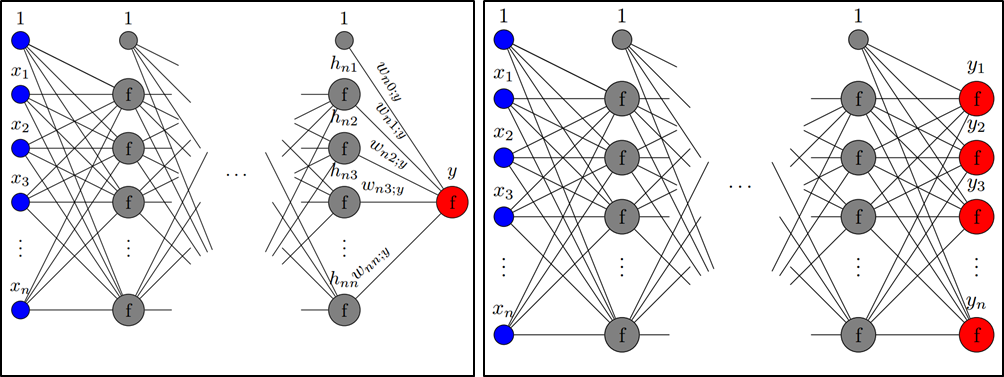

## Let' call this a network

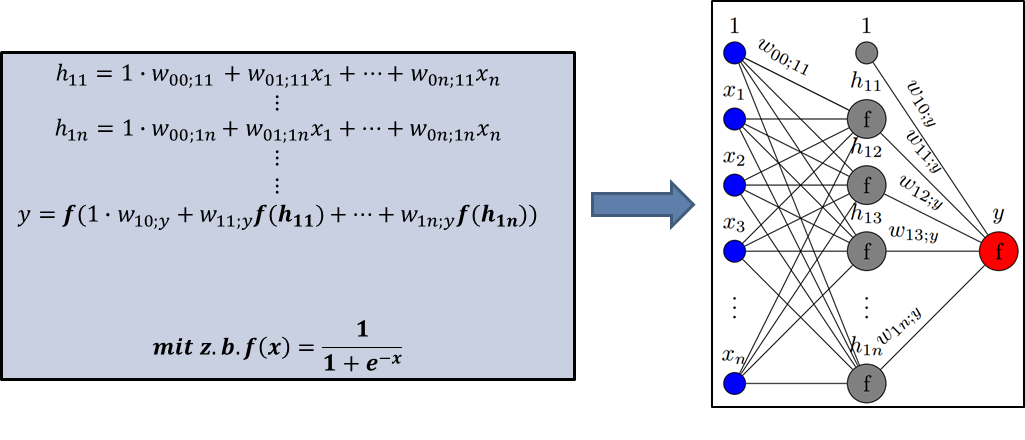

## There are many more activation functions:

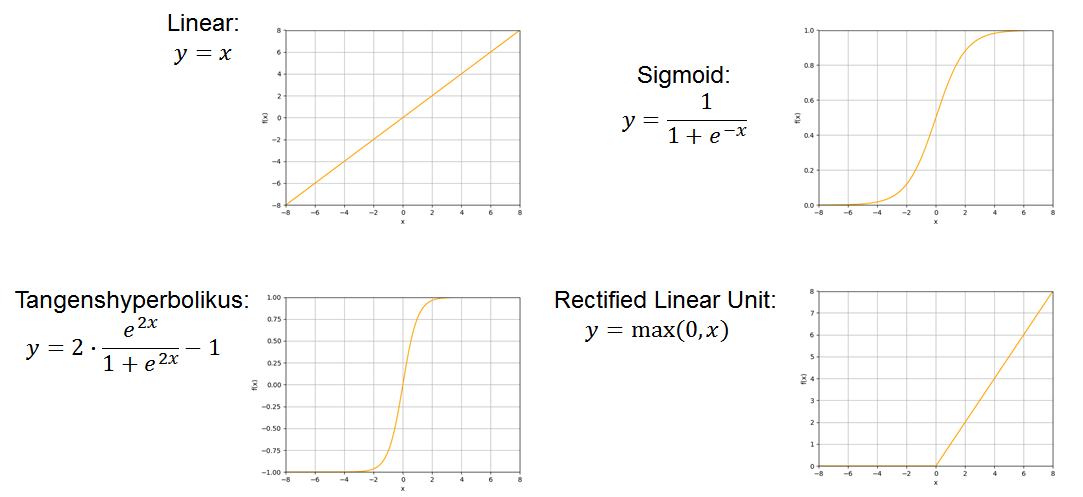

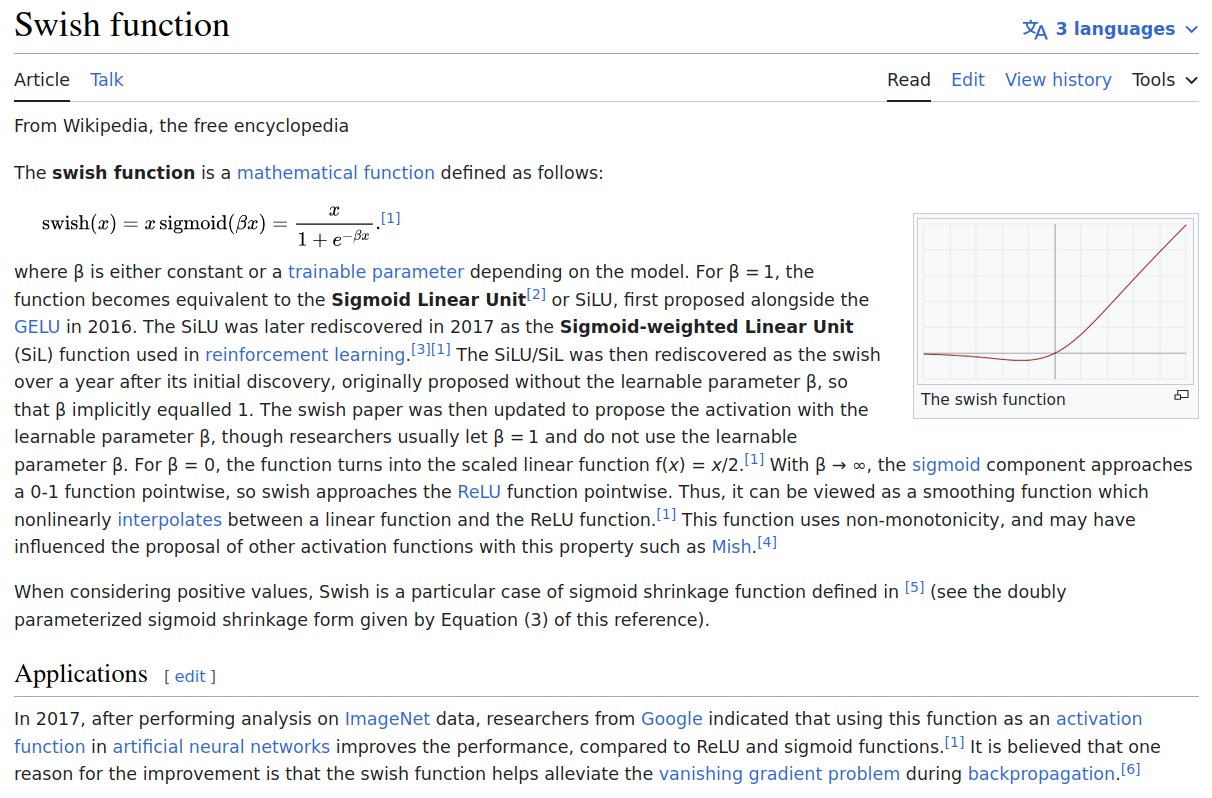

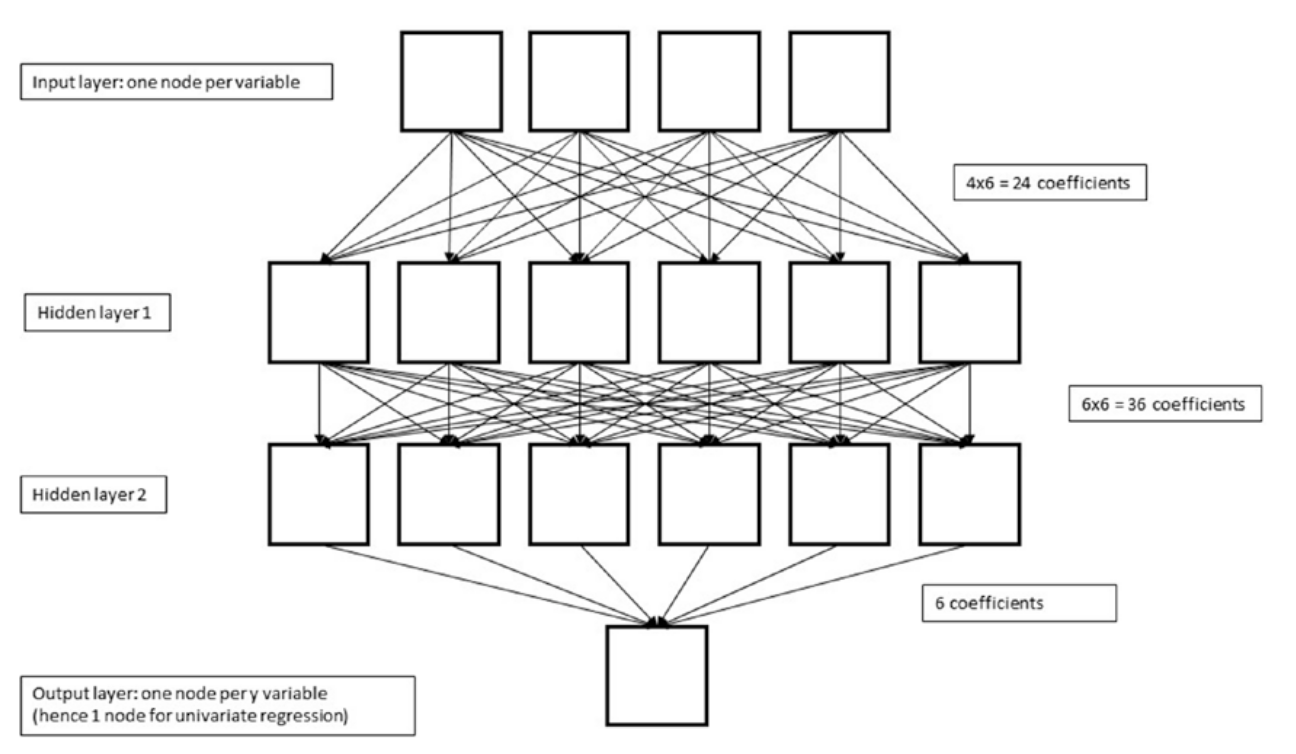

## You can read this schema from top to bottom. The model always contains an input layer and an output layer. The input layer of the network contains one node for each variable. The output layer contains the same number of nodes as there are output variables. In the case of univariate regression, there is one output variable(the target variable y), but sometimes there can be multiple output variables at the same time, as you’ve seen, for example, in the VAR model. In this case, there would be multiple nodes in the output layer.


## After the input, you go to the first hidden layer. Roughly speaking, the values of the hidden layer are computed by multiplying the input by a weight and then passing the value through an activation function. This combination of multiplication and activation functions repeats itself in each node until arriving at the output node. This model is called a fully connected model because each node is connected to each node in the following layer. There are other shapes of architectures in which this is not the case: we’ll see some examples later.

## **The Weights: Backpropagation**

## So while moving an input value through your neural network, you encounter something else besides the activation layer: the weights. These weights are estimated at the time of model fitting, through an algorithm called the backpropagation algorithm.

## The backpropagation algorithm computes the gradient of the loss function with respect to the weights of the network, one layer at a time. It then iterates backward from the last layer, which is why it is called backpropagation. It is an efficient way for fitting the huge number of weights that is needed for a neural network. Yet it is still a complex algorithm, and it takes time to compute.

## **Optimizers**

## SGD, short for Stochastic Gradient Descent, is an improved version of the gradient descent algorithm. It is more efficient as it computes not on the whole dataset at every iteration, but only a subset of the dataset.

## Two improvements have been made on SGD, and those have delivered two new optimizers: RMSProp and AdaGrad. An even more improved optimizer called Adam uses a combination of those two.

- SGD = Stochastic Gradient Descent
- RMSProp = Root Mean Square Propagation
- AdaGrad = adaptive gradient algorithm
- Adam = Adaptive Moment Estimation

## Check-Out:

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

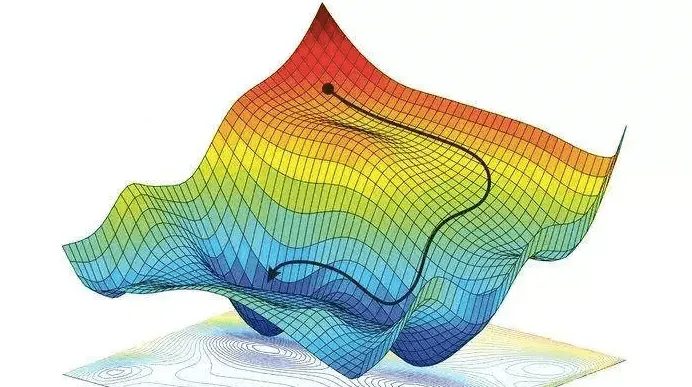

## SGD:

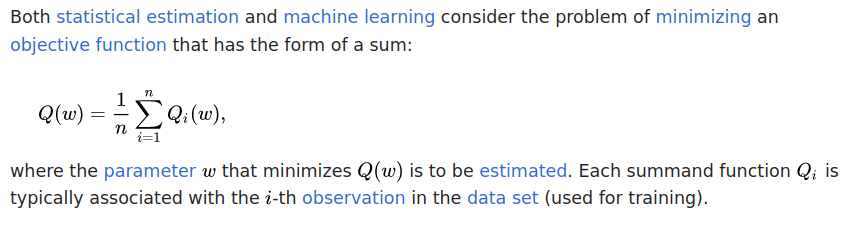

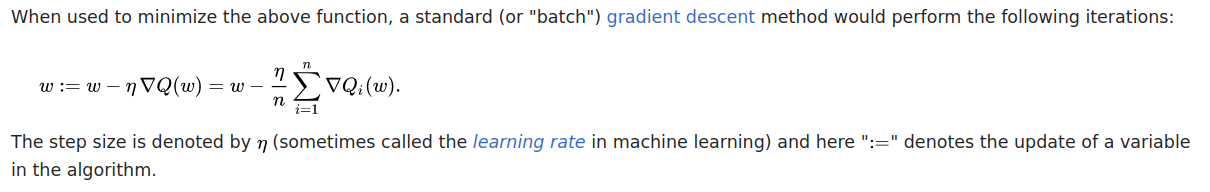

## RMSProp:

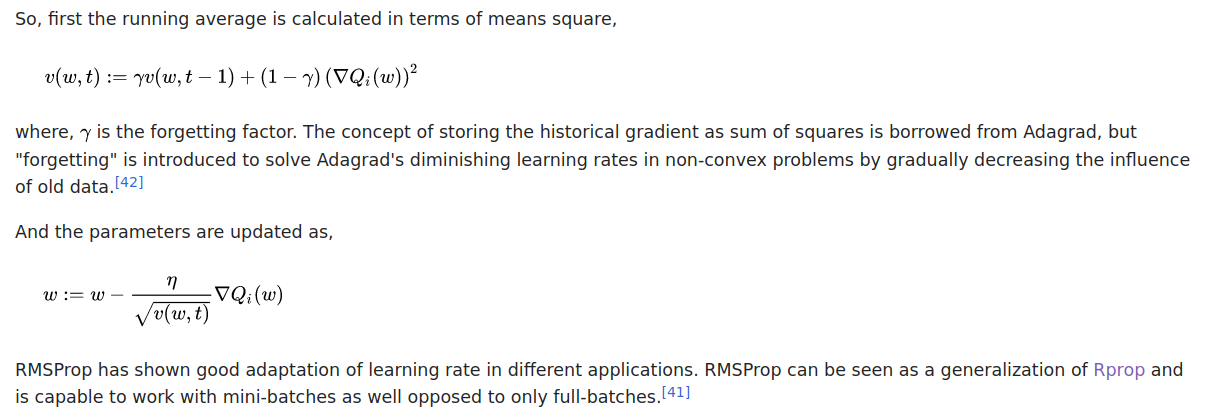

## **Learning Rate of the Optimizer**

## The next thing that you need to choose as a hyperparameter is the learning rate of your optimizer. You can see it as follows. Your optimizer is going to find the right way to move in, and it is going to take a step in that direction. Yet those steps can be either large or small steps. This depends on the learning rate that you choose.

## Choosing large learning rates means that you take large steps in the right direction. Yet a risk is that you take too large steps, and therefore you step over the optimum and then miss it.

## A small learning rate on the other hand may let you get stuck into a local optimum and not be able to get out, as your step size is too small. You may also take a long time to converge.

## **Hyperparameters at Play in Developing a NN**

## Now until here, the overview is not much different than what we’ve seen before, for example, in Random Forests and XGBoost. Yet there is a big difference in developing Neural Networks: the number of hyperparameters and the time of training the model are so huge that it becomes impossible to simply launch a hyperparameter optimization tool.

## This is all due to the backpropagation algorithm used for fitting the neural network.

## In short, this algorithm goes back and forth through the network, and it updates the weights. It does not pass all the data at once, but it passes batch by batch until all the data has been passed. When all data has been passed, this is called an epoch.

## As you have seen, for neural networks, a lot of hyperparameter tuning has to be done. A lot of this is done by hand, using specific tools to judge the quality of the model fit. Building Neural Networks is much more complex than fitting classical machine learning models.

## As an overview, the main neural network’s hyperparameters are
- **The number of layers**
- **The number of nodes in each of the layers**
- **The optimizer** is the method to update the weights throughout backpropagation. **One of the standard optimizers is Adam**, but there are many more.
- **The learning rate of the optimizer** influences the step size of the
optimizer. Too small learning rates make the steps toward the
optimum too small and can make it too slow, or you can get blocked
in a local optimum.
- **The batch size** specifies the number of individuals that will be used
for each pass through the algorithm. If it’s too large, you may run out
of RAM; but if it’s too small, it may be too slow.
- **The number of epochs** is the number of times that the whole dataset
is passed through the network. The more epochs, the longer the
model continues training. But this should really depend on at which
moment you reach the optimum.

## **Introducing the Example Data**

## Before moving on to the fitting and optimization of the neural network, let’s introduce the example data and two data preparation methods. In this chapter, we’ll be using the example data from the Max Planck Institute for Biogeochemistry.

## The dataset is called the Jena Climate dataset. It contains weather measures like temperature, humidity, and more, recorded every 10 minutes.

## You can download the data from
##https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip.

## You can also download and unzip it and use pandas to import it with

In [1]:
# Importing the data

import keras
import pandas as pd
from zipfile import ZipFile
import os

In [3]:
import pandas as pd
from zipfile import ZipFile
from tensorflow import keras

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)
del zip_file

df = df.drop('Date Time', axis=1)
cols = ['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'mwv', 'wd']
df.columns = cols


13568290/13568290 [==============================] - 0s 0us/step


In [4]:
# Creating the lagged dataset
y = df.loc[2*72:,'T']
lagged_x = []
for lag in range(72,2*72,12):
  lagged = df.shift(lag)
  lagged.columns = [x + '.lag' + str(lag) for x in lagged.columns]
  lagged_x.append(lagged)
df = pd.concat(lagged_x, axis=1)
df = df.iloc[2*72:,:] #drop missing values due to lags

In [5]:
df

,p.lag72,T.lag72,Tpot.lag72,Tdew.lag72,rh.lag72,VPmax.lag72,VPact.lag72,VPdef.lag72,sh.lag72,H2OC.lag72,...,rh.lag132,VPmax.lag132,VPact.lag132,VPdef.lag132,sh.lag132,H2OC.lag132,rho.lag132,wv.lag132,mwv.lag132,wd.lag132
144,1000.21,-6.77,266.38,-8.19,89.5,3.67,3.29,0.39,2.05,3.29,...,93.5,3.12,2.92,0.20,1.82,2.93,1312.11,0.16,0.50,158.3
145,1000.18,-6.70,266.44,-8.09,89.8,3.69,3.32,0.38,2.06,3.32,...,93.5,3.13,2.92,0.20,1.83,2.93,1312.15,0.36,0.63,184.8
146,1000.14,-6.61,266.54,-8.00,89.7,3.72,3.34,0.38,2.08,3.34,...,93.9,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.9
147,1000.02,-6.51,266.65,-7.93,89.5,3.75,3.36,0.39,2.09,3.36,...,93.6,3.17,2.97,0.20,1.85,2.98,1311.38,0.07,0.50,272.4
148,1000.02,-6.21,266.95,-7.65,89.4,3.84,3.43,0.41,2.14,3.43,...,93.5,3.16,2.95,0.21,1.85,2.96,1311.64,0.32,0.63,219.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1005.28,-2.96,269.79,-6.30,77.6,4.91,3.81,1.10,2.36,3.79,...,86.0,4.35,3.74,0.61,2.31,3.71,1305.47,1.26,1.52,190.9
420547,1005.15,-2.52,270.25,-6.24,75.4,5.07,3.83,1.25,2.37,3.81,...,85.3,4.31,3.68,0.63,2.27,3.65,1305.78,1.10,1.76,192.9
420548,1005.00,-1.92,270.85,-6.15,72.7,5.30,3.85,1.45,2.39,3.84,...,87.6,4.27,3.74,0.53,2.31,3.71,1306.33,1.12,1.76,156.9
420549,1004.84,-1.89,270.89,-6.35,71.4,5.31,3.79,1.52,2.35,3.78,...,89.4,4.22,3.77,0.45,2.33,3.75,1306.92,1.08,1.94,178.7


## **Specific Data Prep Needs for a NN**

## Neural Networks are very sensitive to problems with the input data. Let’s have a look at two tools that are often useful in data preparation.

## **Scaling and Standardization**

## A neural network will not be able to learn if you do not standardize the input data. Standardizing means getting the data onto the same scale. Two examples for this are a standard scaler and a MinMax scaler:

## - **A standard scaler** maps a variable to follow a standard normal distribution. That is, the new mean of the variable is 0, and the new standard deviation is 1. It is obtained by taking each value minus the average of the variable and then dividing it through the standard deviation.

## - **The MinMax scaler** brings a variable into the range of 0–1 by subtracting the variable’s minimum from each value and then dividing it by the range of the variable. You can apply a scaler using

In [6]:
#Fitting the MinMaxScaler
# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [7]:
df

,p.lag72,T.lag72,Tpot.lag72,Tdew.lag72,rh.lag72,VPmax.lag72,VPact.lag72,VPdef.lag72,sh.lag72,H2OC.lag72,...,rh.lag132,VPmax.lag132,VPact.lag132,VPdef.lag132,sh.lag132,H2OC.lag132,rho.lag132,wv.lag132,mwv.lag132,wd.lag132
0,0.851204,0.269365,0.259796,0.349543,0.879380,0.043298,0.090810,0.008476,0.087918,0.088865,...,0.925330,0.034543,0.077370,0.004347,0.074872,0.076017,0.756263,0.997175,0.997705,0.439722
1,0.850909,0.270526,0.260784,0.351621,0.882826,0.043617,0.091900,0.008259,0.088486,0.089936,...,0.925330,0.034702,0.077370,0.004347,0.075440,0.076017,0.756383,0.997195,0.997718,0.513333
2,0.850516,0.272019,0.262430,0.353491,0.881677,0.044094,0.092626,0.008259,0.089620,0.090650,...,0.929925,0.035339,0.079550,0.004130,0.077141,0.078158,0.754048,0.997192,0.997730,0.433056
3,0.849337,0.273677,0.264241,0.354946,0.879380,0.044572,0.093353,0.008476,0.090187,0.091363,...,0.926479,0.035339,0.079186,0.004347,0.076574,0.077802,0.754078,0.997166,0.997705,0.756667
4,0.849337,0.278653,0.269180,0.360765,0.878231,0.046004,0.095895,0.008911,0.093023,0.093862,...,0.925330,0.035180,0.078460,0.004564,0.076574,0.077088,0.754856,0.997191,0.997718,0.608889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420402,0.901032,0.332559,0.315937,0.388820,0.742677,0.063037,0.109699,0.023908,0.105502,0.106709,...,0.839173,0.054123,0.107156,0.013258,0.102666,0.103854,0.736388,0.997284,0.997807,0.530278
420403,0.899754,0.339857,0.323510,0.390067,0.717404,0.065584,0.110425,0.027168,0.106069,0.107423,...,0.831132,0.053486,0.104976,0.013693,0.100397,0.101713,0.737316,0.997269,0.997831,0.535833
420404,0.898280,0.349809,0.333388,0.391937,0.686387,0.069245,0.111151,0.031515,0.107204,0.108494,...,0.857553,0.052849,0.107156,0.011519,0.102666,0.103854,0.738963,0.997271,0.997831,0.435833
420405,0.896708,0.350307,0.334047,0.387781,0.671453,0.069405,0.108972,0.033036,0.104935,0.106353,...,0.878231,0.052053,0.108246,0.009780,0.103800,0.105282,0.740729,0.997267,0.997849,0.496389


## **Principal Component Analysis (PCA)**

## The PCA is a machine learning model in itself. It comes from the family of dimension reduction models. It allows to take a dataset with a large number of variables and reduce the number of variables into a projection onto a number of dimensions. Those dimensions will contain the larger part of the information and will contain much less noise.

## Making sure that the input data contains less noise will strongly help during the fitting of your Neural Network. So how does the PCA work? The idea is to make new variables, called components, based on combinations of strongly correlated variables.

##In Figure below, you can see a hypothetical example with two variables Rain and Humidity that you can expect to be correlated. The first principal component captures the most possible variation.

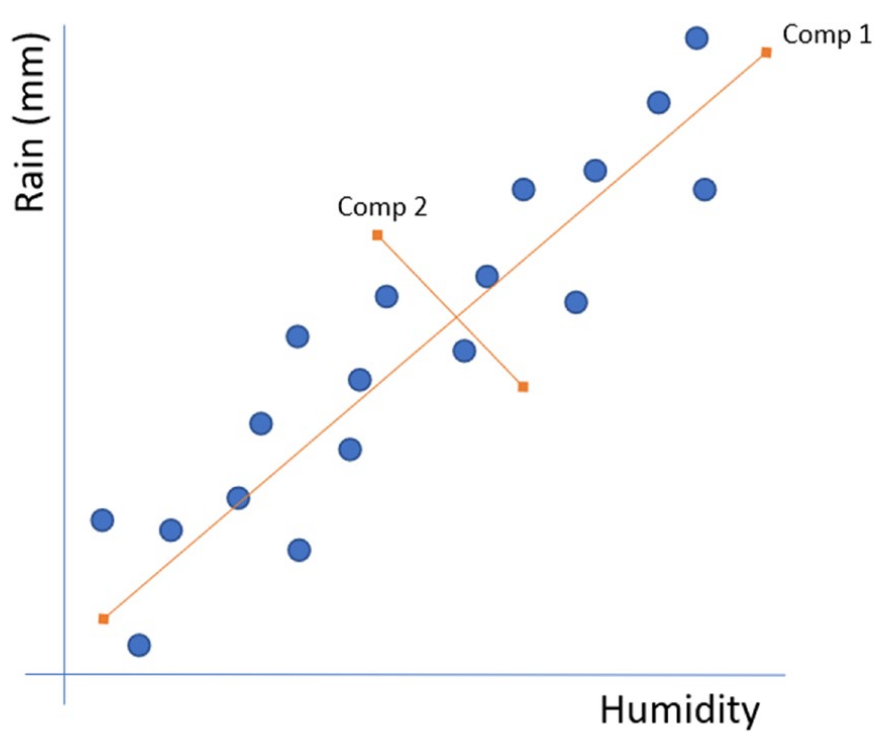

## The component is a mathematical formula that is a linear combination of the original variables. You can use this score as a new variable. If the principal component is capturing a lot of the original variables, it can be interesting to use the component in your machine learning model rather than the original variables. To fit a PCA, you generally start with a PCA with all the components.

In [8]:
#Fitting the full PCA
# Fit a PCA with maximum number of components
from sklearn.decomposition import PCA
mypca = PCA()
mypca.fit(df)

PCA()

## You use this PCA to make a scree plot. A scree plot is one of multiple tools used to decide on the number of components to retain. At the point of the elbow, you choose the number of components.

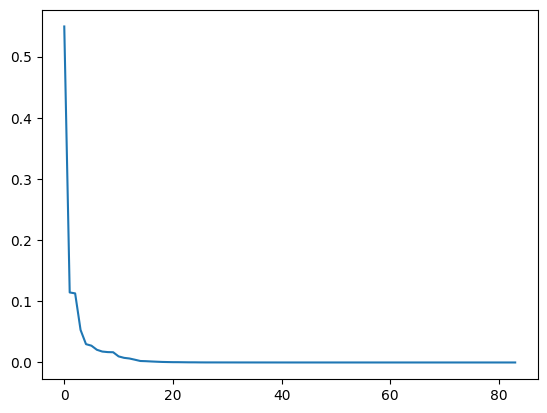

In [9]:
#Making a scree plot
# Make a scree plot
import matplotlib.pyplot as plt
plt.plot(mypca.explained_variance_ratio_)
plt.show()

## In this plot, the x-axis shows the components from the first component to the last. The y variable shows the amount of variation that is captured in those components. So you clearly see that the first five to ten components have much more information in them than the higher components (those more to the right). You could see the elbow being somewhere around 5, but it seems a good idea to retain ten components so that we retain almost all information but while having ten variables rather than over 80. Finally, you refit the PCA with ten components and transform the data using:

In [10]:
#Fitting the PCA with ten components
mypca = PCA(10)
df = mypca.fit_transform(df)

In [11]:
df

array([[-1.83051835,  0.11885457, -0.22696868, ...,  0.08943221,
         0.13922905,  0.0755579 ],
       [-1.82804646,  0.08739265, -0.19912815, ...,  0.18613408,
         0.06051631,  0.08265306],
       [-1.82223458,  0.03610448, -0.15152542, ...,  0.40291412,
        -0.12999245,  0.27516718],
       ...,
       [-1.5810452 ,  0.10132937,  0.10305473, ..., -0.09251568,
        -0.04478102, -0.12967238],
       [-1.57915072,  0.28993676, -0.01569915, ..., -0.13176467,
         0.14009866,  0.03391424],
       [-1.5754325 ,  0.2544447 ,  0.01428307, ..., -0.06590846,
        -0.04303614, -0.07022943]])

## **The Neural Network Using Keras**

## Now that we have made sure that our data are correctly prepared, we can finally move on to the actual neural network.

## Building Neural Networks is a lot of work, and I want to find a good balance inshowing you the way to get started and to work on improving your network rather than just showing a final performant network. A general great first start is to start with a relatively simple network and work your way up from there.

## In this case, let’s start with a network using two dense layers with 64 nodes. That would make the architecture look as follows.

##For the other hyperparameters, let’s take things that are a little bit standard:

##- **Optimizer: Adam**

##- **Learning rate: 0.01**

##- **Batch size: 32** (reduce this if you don’t have enough RAM)

##- **Epochs: 10**

##Before starting, let’s do a train-test split

In [12]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33,
random_state=42)

## Now you build the model using the keras library using the following code.

In [13]:
#Specify the model and its architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
random.seed(42)
simple_model = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(64, activation='relu'),
  Dense(1),
])

In [14]:
#Obtain a summary of the model architecture
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Then you compile the model. In the compilation part, you specify the optimizer and the learning rate. You also specify the loss, in our case the Mean Absolute Error.

In [15]:
#Compile the model
simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

## And then you fit the model using Listing 16-11. At the fitting call, you specify the epochs and the batch size. You can also specify a validation split so that you obtain a train-validation-test scenario in which you still have the test set for a final check of the R2 score that is not biased by the model development process.

In [16]:
#Fit the model
smod_history = simple_model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle = True
)

Epoch 1/10
7042/7042 [==============================] - 24s 3ms/step - loss: 2.5958 - mean_absolute_error: 2.5958 - val_loss: 2.4987 - val_mean_absolute_error: 2.4987
Epoch 2/10
7042/7042 [==============================] - 28s 4ms/step - loss: 2.4888 - mean_absolute_error: 2.4888 - val_loss: 2.6426 - val_mean_absolute_error: 2.6426
Epoch 3/10
7042/7042 [==============================] - 26s 4ms/step - loss: 2.4551 - mean_absolute_error: 2.4551 - val_loss: 2.4320 - val_mean_absolute_error: 2.4320
Epoch 4/10
7042/7042 [==============================] - 29s 4ms/step - loss: 2.4341 - mean_absolute_error: 2.4341 - val_loss: 2.4311 - val_mean_absolute_error: 2.4311
Epoch 5/10
7042/7042 [==============================] - 26s 4ms/step - loss: 2.4224 - mean_absolute_error: 2.4224 - val_loss: 2.4129 - val_mean_absolute_error: 2.4129
Epoch 6/10
7042/7042 [==============================] - 29s 4ms/step - loss: 2.4142 - mean_absolute_error: 2.4142 - val_loss: 2.3980 - val_mean_absolute_error: 2.398

## Be aware that fitting neural networks can take a lot of time. Running on GPU is generally fast but not always possible depending on your computer hardware.

## Now the important part here is to figure out whether or not this model has learned something using those hyperparameters. There is a key graph that is going to help you infinitely while building neural networks. You can obtain this graph with the code below.

##Be aware that you may get slightly different results. Setting the random seed is notenough to force randomness to be the same in Keras. Although it is possible to force exact reproducibility in Keras, it is quite complex, so I prefer to leave it out and accept that results are not 100% reproducible. You can check out these instructions for more information on how to fix the randomness in Keras: https://keras.io/getting_started/faq/how-can-i-obtain-reproducible-results-using-keras-during-development.

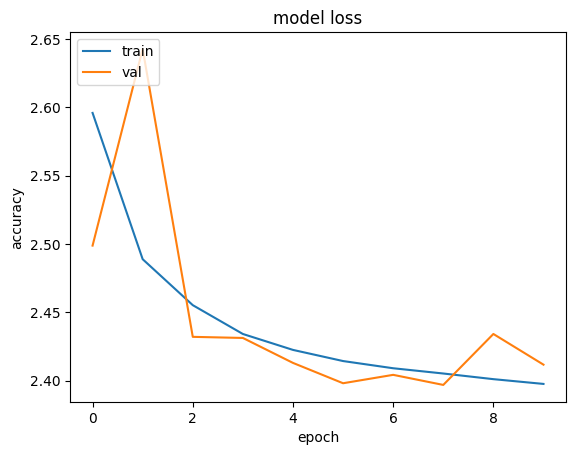

In [17]:
#Plot the training history
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

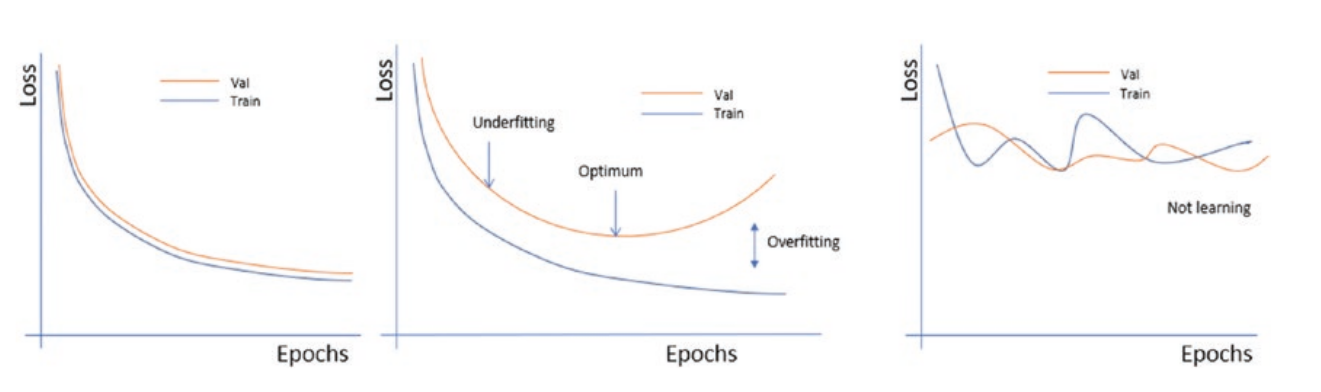

## **From here on, it is honestly a real process of trial and error**. The first model that you should try is generally a very simple one, and it will be not learning enough. The next model that you should search for is a model that does learn, even if in the worst case it is overfitting. Then as the last step, you fine-tune until you obtain a graph close enough to the graph on the left and you obtain an error score that is good enough to you.

## After trial and error, a better model architecture that has been found is listed below

## Far from saying that this is the best model, at least this model is able to obtain a relatively good R2 score on the test data of 0.908. Feel free to try and tweak this model more and see what happens and whether you can improve it.

Epoch 1/50
7042/7042 [==============================] - 118s 16ms/step - loss: 2.6179 - mean_absolute_error: 2.6179 - val_loss: 2.4700 - val_mean_absolute_error: 2.4700
Epoch 2/50
7042/7042 [==============================] - 106s 15ms/step - loss: 2.4530 - mean_absolute_error: 2.4530 - val_loss: 2.3879 - val_mean_absolute_error: 2.3879
Epoch 3/50
7042/7042 [==============================] - 97s 14ms/step - loss: 2.3896 - mean_absolute_error: 2.3896 - val_loss: 2.4060 - val_mean_absolute_error: 2.4060
Epoch 4/50
7042/7042 [==============================] - 101s 14ms/step - loss: 2.3453 - mean_absolute_error: 2.3453 - val_loss: 2.4154 - val_mean_absolute_error: 2.4154
Epoch 5/50
7042/7042 [==============================] - 103s 15ms/step - loss: 2.3047 - mean_absolute_error: 2.3047 - val_loss: 2.3018 - val_mean_absolute_error: 2.3018
Epoch 6/50
7042/7042 [==============================] - 105s 15ms/step - loss: 2.2706 - mean_absolute_error: 2.2706 - val_loss: 2.3053 - val_mean_absolute_e

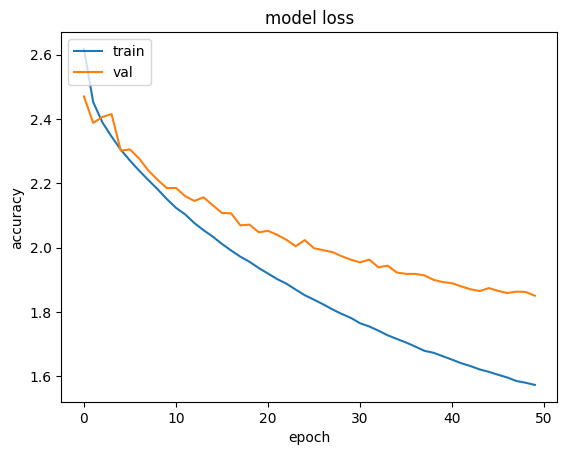

In [21]:
#A better architecture
random.seed(42)
model = Sequential([
  Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(1), ])


model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)
history = model.fit(X_train, y_train,
          #validation_data=(X_test, y_test),
          validation_split=0.2,
          epochs=50,
          batch_size=32,
          shuffle = True
)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import r2_score

preds = model.predict(X_test)
print(r2_score(y_test, preds))


4336/4336 [==============================] - 15s 3ms/step
0.905461881780075


R-squared: 0.905461881780075


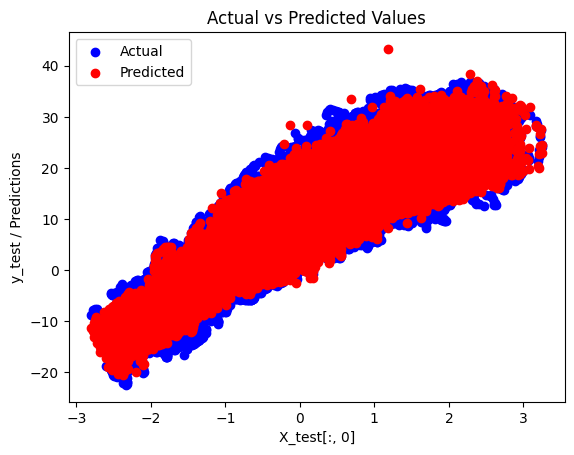

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming you already have preds, y_test, and X_test

# Choose a specific column from X_test
column_to_plot = 0  # Adjust this index based on the column you want to plot

# Extract the selected column
x_values = X_test[:, column_to_plot]

# Calculate R-squared
r2 = r2_score(y_test, preds)
print(f'R-squared: {r2}')

# Plotting the actual vs predicted values
plt.scatter(x_values, y_test, color='blue', label='Actual')
plt.scatter(x_values, preds, color='red', label='Predicted')
plt.xlabel(f'X_test[:, {column_to_plot}]')
plt.ylabel('y_test / Predictions')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
